# Programing exercise 1: Single particle in a 1D potential

Due on Monday, 29.10.2018, 14.15h

### Total: 100 points

## Defining the problem

We want to calculate the eigenenergies and eigenfunction of a quantum particle in a on-dimensional potential, i.e. solve the eigenvalue problem

$$\left[\frac{1}{2} \partial_{x}^2 + V(x)\right] \phi(x) = E \phi(x)$$

by representing the wave function $\phi(x)$ on a discrete spatial grid.

In [260]:
# load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline
from ipywidgets import interactive

#Plot settings
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

### Exercise 1 (25 points)

Solve the eigenproblem using numpys.linalg.eig().
Use a grid size of 20 length units and 401 gridpoints as a test case and plot the eigenfunctions.

In [464]:
#Simplifying the problem by setting some variables to 1
hbar=1
m=1
omega=1

#defining potential of the harmonic oscillator 
def potential(x):
    return 0.5*m*omega**2*x**2

#defining the grid structure 
L = 20
N = 401
grid = np.linspace(-L/2,L/2,N)

delta_x = L/N

#Writing down the Hamiltonian as a tridiagonal matrix

def Hamiltonian():
    maindiag = potential(grid) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(grid)-1)
    H = np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    return H

print("The Hamiltonian for this problem has the following structure:")
print()
print(Hamiltonian())

The Hamiltonian for this problem has the following structure:

401


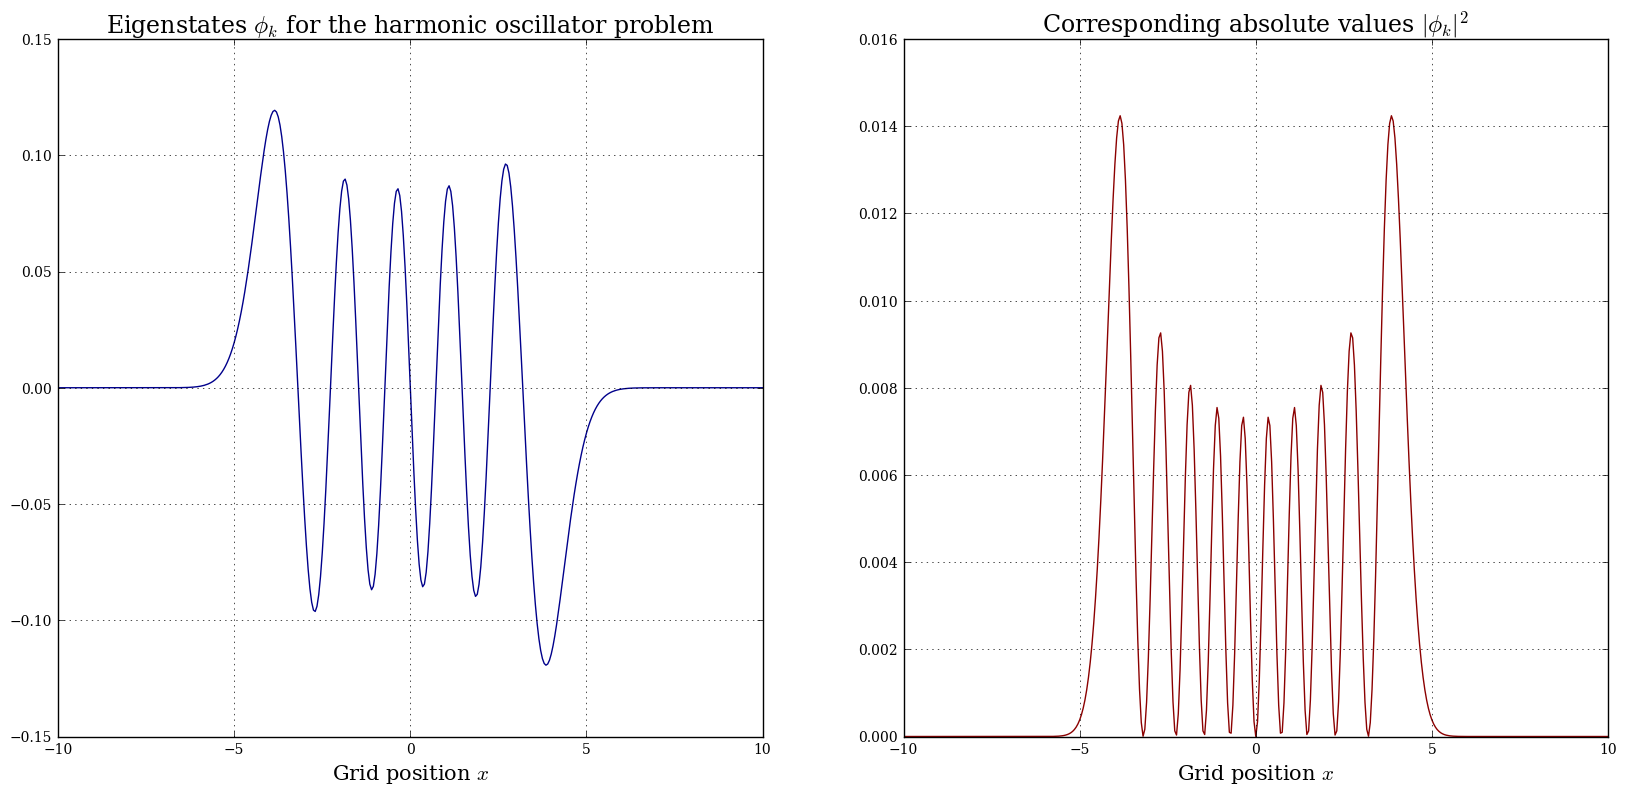

In [462]:
plt.rcParams["figure.figsize"][0] = 20

#Diagonalize the Hamiltonian to solve the eigenvalue problem
energies, states = np.linalg.eig(Hamiltonian())

#Sorting the results
energy_index = np.argsort(energies)

#Plotting the final result
def eigenfunctions(k):
    plt.subplot(121)
    plt.plot(grid,states[:,energy_index[k]],color = 'darkblue')
    plt.title(r'Eigenstates $\phi_k$ for the harmonic oscillator problem' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(grid,np.abs(states[:,energy_index[k]])**2, color = 'darkred')
    plt.title(r'Corresponding absolute values $|\phi_k|^2$' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(eigenfunctions,k=(0,19))

### Exercise 2 (15 points)

Check the convergence of the numerical solutions with respect to grid size and spacing. Compare the eigenvalues and eigenfunction to analytical solutions. You may find the function scipy.special.hermite(...) useful.

In [288]:
from scipy.special import hermite 
from math import factorial as fact

#Exact solutions for the harmonic oscillator

def phi_exact(k,x): #k is a natural number representing the exictation state
    f = hermite(k)
    return 1/np.sqrt(2**k*fact(k)*np.sqrt(np.pi))*f(x)*np.exp(-x**2/2)

def energy_exact(k):
    return hbar*omega*(k+1/2)

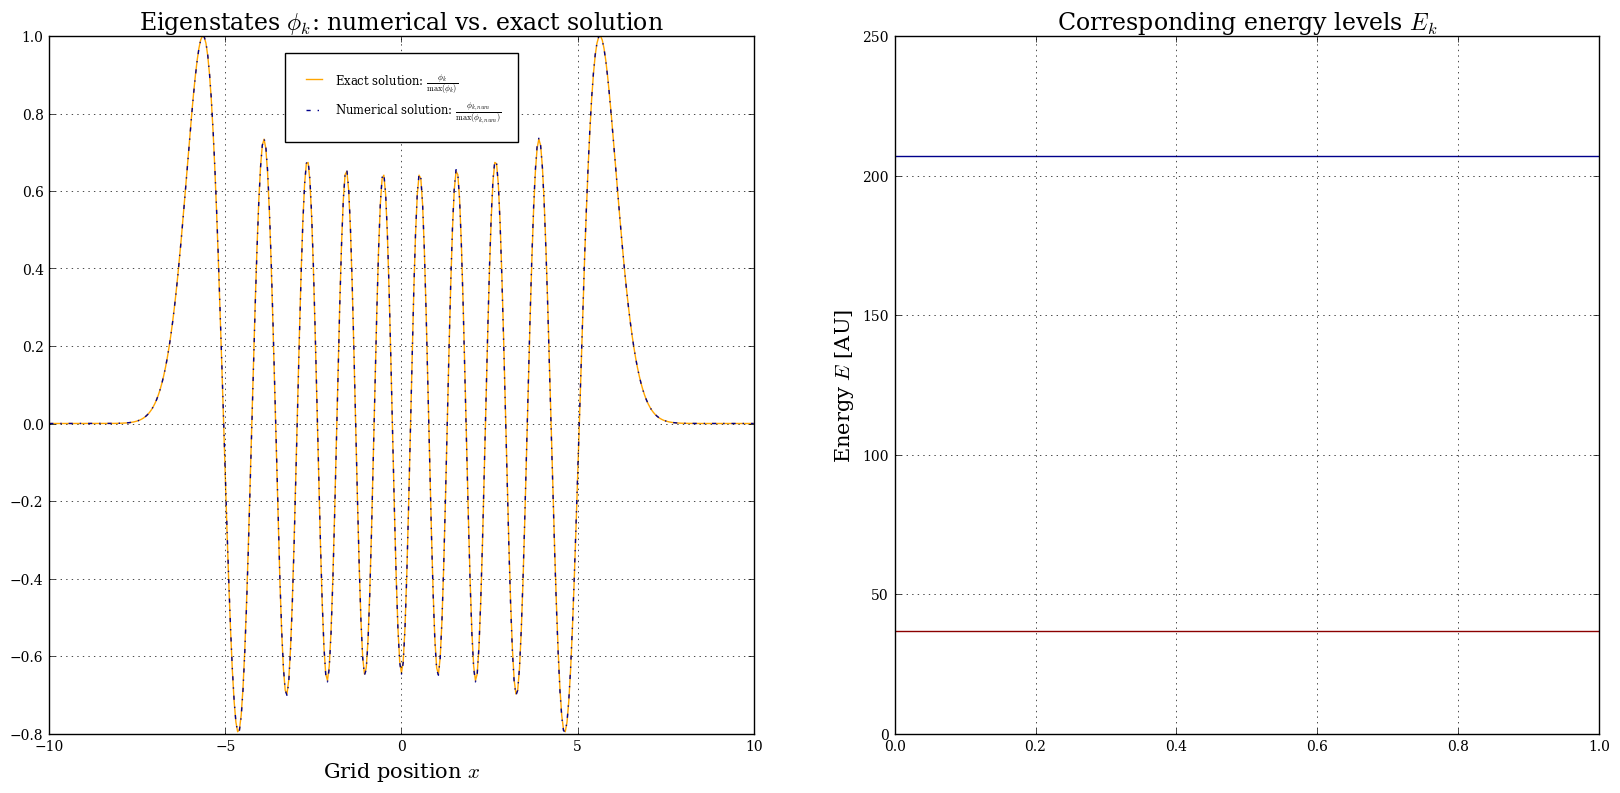

In [361]:
#Plotting the results from exercise 1 in comparison with the exact (known) solution
def comparison(k,signum):
    """
    The second option 'signum' gives us the possibility to correct the signs of the wave functions
    which sometimes have been swapped during the diagonalization process in exercise one.
    Simply change signum to +1 or -1 until both images have the same orientation.
    """
    plt.subplot(121)
    #Normalizing both curves with the respective maximum for better comparability
    plt.plot(grid,phi_exact(k,grid)/max(phi_exact(k,grid)), color = 'orange',
            label= r'Exact solution: $\frac{\phi_{k}}{\operatorname{max}(\phi_{k})} $')
    plt.plot(grid,signum*states[:,energy_index[k]]/max(signum*states[:,energy_index[k]]),color = 'darkblue',
             ls = '-.',label= r'Numerical solution: $\frac{\phi_{k, num}}{\operatorname{max}(\phi_{k,num})} $')
    plt.title(r'Eigenstates $\phi_k$: numerical vs. exact solution' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    #plt.ylim=(-1.5,1.5)
    plt.grid(True)
    plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')


    
    plt.subplot(122)
    plt.plot(np.linspace(0,1,2),(energies[energy_index[k]],energies[energy_index[k]])/max(states[:,energy_index[k]]), color = 'darkblue')
    plt.plot(np.linspace(0,1,2),(energy_exact(k),energy_exact(k))/max(phi_exact(k,grid)), color = 'darkred')
    plt.title(r'Corresponding energy levels $E_k$' , size = 17)
    plt.ylabel('Energy $E$ [AU]',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(comparison,k=(0,20),signum=(-1,1,2))


### Exercise 3 (15 points)

How does the runtime scale with the basis size (number of grid points)? (For example increase the number of gridpoints from 101 to 1601 in steps of 100) Interpret the result. How does it scale with the number of gridpoints? 

In [268]:
import time

#Defining the different qrid size options
gridsizes = np.linspace(101,1601,16)

runtimes = []
for size in gridsizes:
    grid2 = np.linspace(-L/2,L/2,size)
    delta_x2 = L/size
    def Hamiltonian2():
        maindiag = potential(grid2) + 1/(delta_x2**2)*np.ones(len(grid2))
        nextdiag = -1/(2*delta_x2**2)*np.ones(len(grid2)-1)
        return np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    #Diagonalizing the new Hamiltonians
    t1 = time.time()
    eigenvalues, eigenvectors = np.linalg.eig(Hamiltonian2())    
    t2 = time.time()
    #Saving time data
    runtimes.append(t2-t1)   


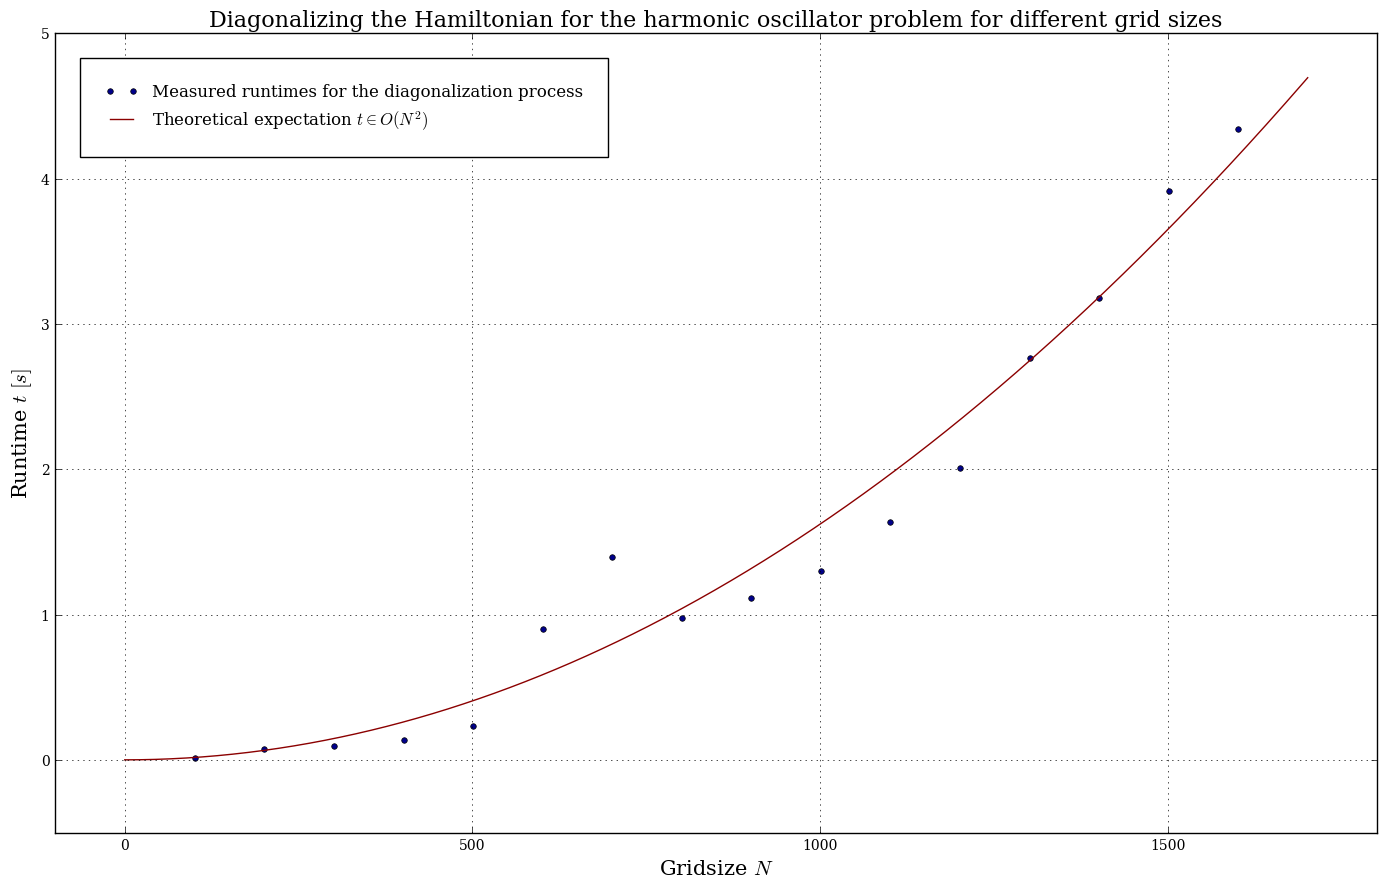

In [269]:
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"][0] = 14

#Theoretical expectation
def quadratic_curve(x,a):
    return a*x**2 
popt,pcov = curve_fit(quadratic_curve, gridsizes, runtimes)

#Plotting the result and comparing it to the expected relation
plt.plot(gridsizes,runtimes,color='darkblue', ls='', markersize='4', marker = 'o', label='Measured runtimes for the diagonalization process')
plt.plot(np.linspace(0,1701,1000),quadratic_curve(np.linspace(0,1701,1000),*popt),color='darkred', label= r'Theoretical expectation $t \in O(N^2)$ ')
plt.xlim(-100,1800)
plt.ylim(-0.5,5)
plt.title('Diagonalizing the Hamiltonian for the harmonic oscillator problem for different grid sizes', size=16)
plt.xlabel(r'Gridsize $N$',size=15)
plt.ylabel(r'Runtime $t \ [s]$',size=15)
plt.grid(True)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving the output
plt.tight_layout()
plt.savefig('runtimes.pdf', format='PDF')

### Exercise 4 (20 points)

Calculate only the lowest (e.g. 20) eigenvalues, using sparse matrices. Compare the runtime to your previous implementation. For diagonalising a sparse symmetric matrix, you can use scipy.sparse.linalg.eigsh(...)

In [450]:
import scipy.sparse as sparse


#Defining the Hamiltonian as a sparse matrix
def Hamiltonian_sparse():
    maindiag = potential(grid) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(grid)-1)
    data = np.vstack((maindiag,np.hstack(([0],nextdiag)),np.hstack((nextdiag,[0]))))
    offsets = np.array([0, 1, -1])
    H = sparse.dia_matrix((data, offsets), shape=(len(maindiag),len(maindiag)))
    return H

print("The Hamiltonian implemented as sparse matrix has the following structure:")
print()
print(Hamiltonian_sparse())

The Hamiltonian implemented as sparse matrix has the following structure:

  (0, 0)	452.0025
  (1, 1)	451.50375
  (2, 2)	451.0075
  (3, 3)	450.51375
  (4, 4)	450.0225
  (5, 5)	449.53375
  (6, 6)	449.0475
  (7, 7)	448.56375
  (8, 8)	448.0825
  (9, 9)	447.60375
  (10, 10)	447.1275
  (11, 11)	446.65375
  (12, 12)	446.1825
  (13, 13)	445.71375
  (14, 14)	445.2475
  (15, 15)	444.78375
  (16, 16)	444.3225
  (17, 17)	443.86375
  (18, 18)	443.4075
  (19, 19)	442.95375
  (20, 20)	442.5025
  (21, 21)	442.05375
  (22, 22)	441.6075
  (23, 23)	441.16375
  (24, 24)	440.7225
  :	:
  (376, 375)	-201.00125
  (377, 376)	-201.00125
  (378, 377)	-201.00125
  (379, 378)	-201.00125
  (380, 379)	-201.00125
  (381, 380)	-201.00125
  (382, 381)	-201.00125
  (383, 382)	-201.00125
  (384, 383)	-201.00125
  (385, 384)	-201.00125
  (386, 385)	-201.00125
  (387, 386)	-201.00125
  (388, 387)	-201.00125
  (389, 388)	-201.00125
  (390, 389)	-201.00125
  (391, 390)	-201.00125
  (392, 391)	-201.00125
  (393, 392)	-201.0

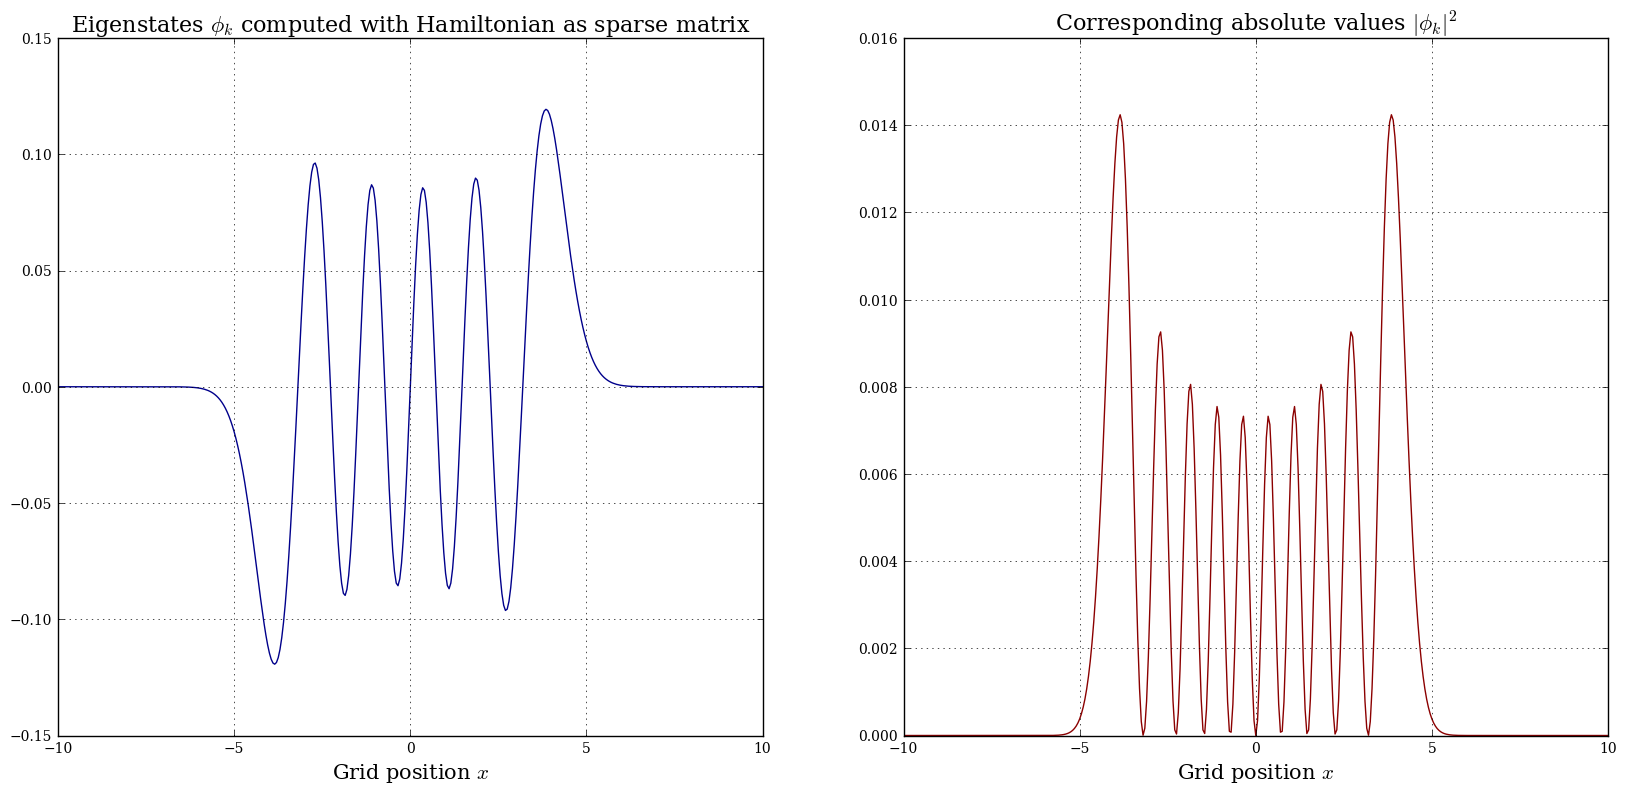

In [465]:
#Diagonalizing the resulting sparse matrix
energies_sparse, states_sparse = sparse.linalg.eigsh(Hamiltonian_sparse(),20, which='SM') #the 20 smallest eigvals

#Plotting the final result
def eigenfunctions_sparse(k):
    plt.subplot(121)
    plt.plot(grid,states_sparse[:,k],color = 'darkblue')
    plt.title(r'Eigenstates $\phi_k$ computed with Hamiltonian as sparse matrix' , size = 16)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(grid,np.abs(states_sparse[:,k])**2, color = 'darkred')
    plt.title(r'Corresponding absolute values $|\phi_k|^2$' , size = 16)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(eigenfunctions_sparse,k=(0,19))

In [494]:
#Now we compare the runtimes from exercise 3 with the ones from the sparse matrix method used above

#Recalculating the eigvals from exercise1 with the same method as in exercise 4 -> better comparability
runtimes_classic = []
for size in gridsizes:
    grid2 = np.linspace(-L/2,L/2,size)
    delta_x2 = L/size
    def Hamiltonian_classic():
        maindiag = potential(grid2) + 1/(delta_x2**2)*np.ones(len(grid2))
        nextdiag = -1/(2*delta_x2**2)*np.ones(len(grid2)-1)
        return np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    #Diagonalizing the classic Hamiltonians
    t1 = time.time()
    eigenvalues, eigenvectors = sparse.linalg.eigsh(Hamiltonian_classic(),20, which='SM')     
    t2 = time.time()
    #Saving time data
    runtimes_classic.append(t2-t1)  

#time measurement for the sparse matrix method
runtimes_sparse = []
for size in gridsizes:
    grid2 = np.linspace(-L/2,L/2,size)
    delta_x2 = L/size
    def Hamiltonian_sparse2():
        maindiag = potential(grid2) + 1/delta_x2**2
        nextdiag = -1/(2*delta_x2**2)*np.ones(len(grid2)-1)
        data = np.vstack((maindiag,np.hstack(([0],nextdiag)),np.hstack((nextdiag,[0]))))
        offsets = np.array([0, 1, -1])
        return sparse.dia_matrix((data, offsets), shape=(len(maindiag),len(maindiag)))
    #Diagonalizing the Hamiltonians computed as sparse matrix
    t1 = time.time()
    eigenvalues, eigenvectors = sparse.linalg.eigsh(Hamiltonian_sparse2(),20, which='SM')   
    t2 = time.time()
    #Saving time data
    runtimes_sparse.append(t2-t1)   

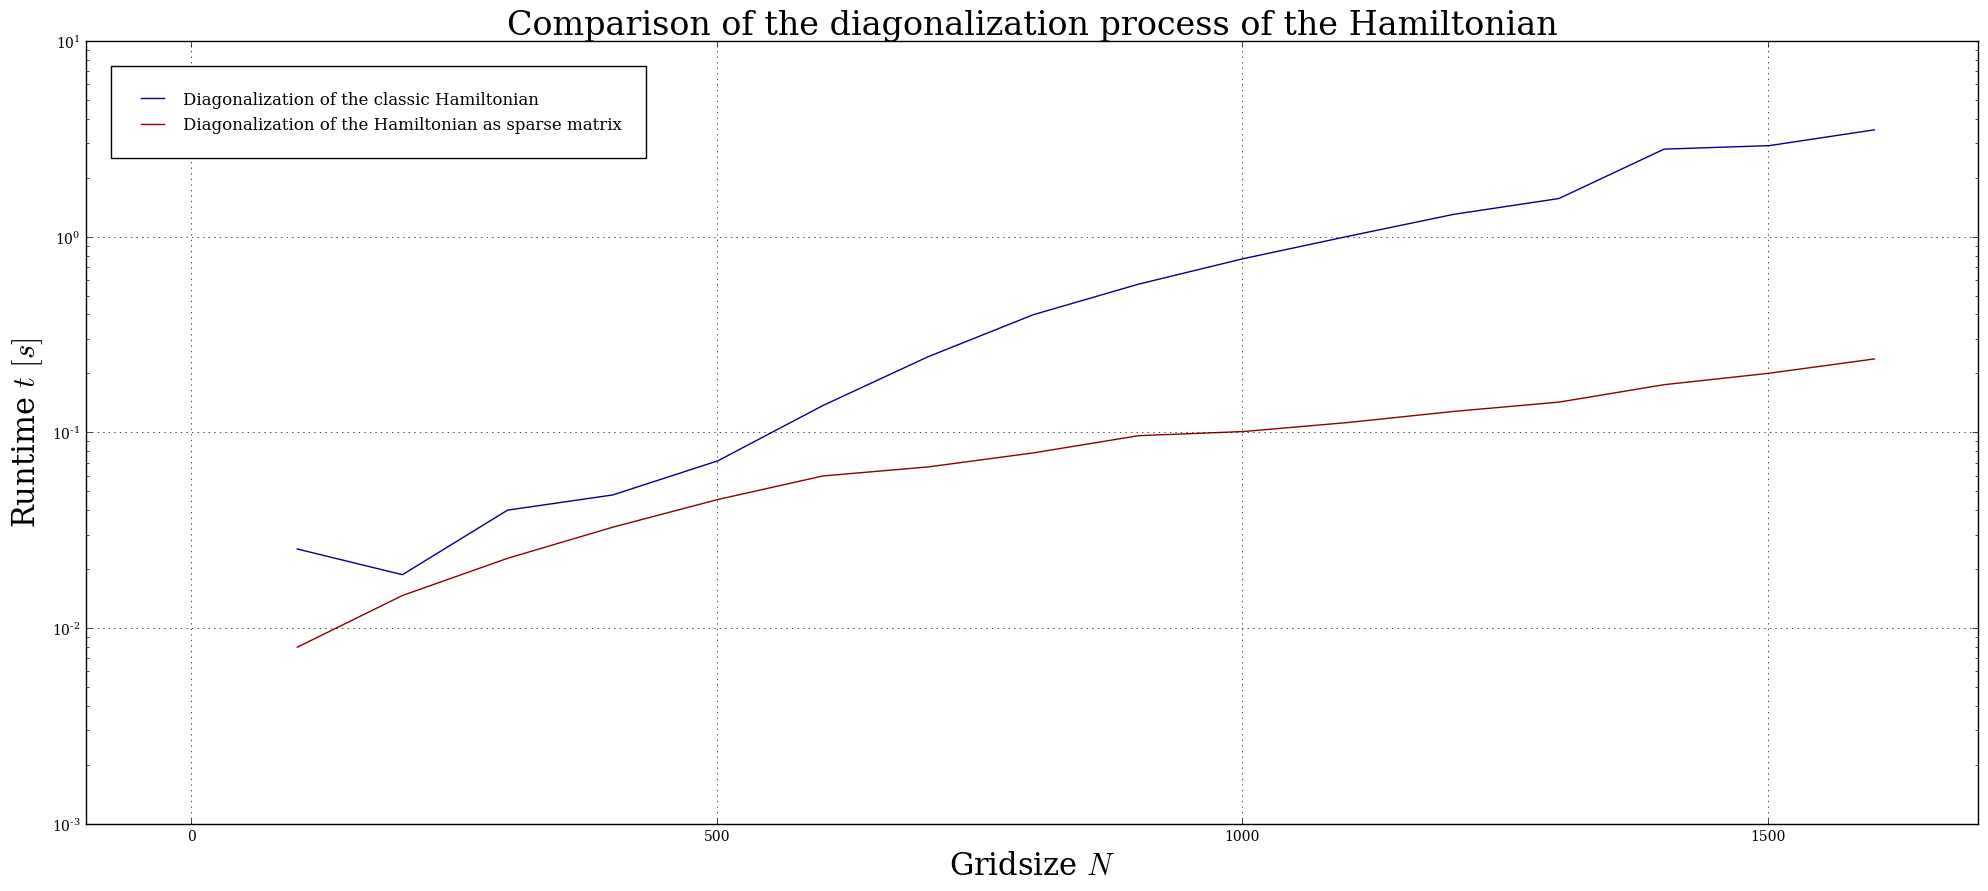

In [510]:
#Plotting the result and comparing both methods
plt.plot(gridsizes,runtimes_classic,color='darkblue', markersize='4', label='Diagonalization of the classic Hamiltonian')
plt.plot(gridsizes,runtimes_sparse,color='darkred', markersize='4', label='Diagonalization of the Hamiltonian as sparse matrix')

plt.xlim(-100,1700)
#plt.ylim(-0.5,5)
plt.title('Comparison of the diagonalization process of the Hamiltonian', size=24)
plt.xlabel(r'Gridsize $N$',size=22)
plt.ylabel(r'Runtime $t \ [s]$',size=22)
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving the output
plt.tight_layout()
plt.savefig('runtimes2.pdf', format='PDF')

### Exercise 5 (15 points)

Implement the time evolution of superpositions of eigenstates as initial states. Hint: Read about broadcasting rules in python. Animate the time evolution using the framework sketched below:

In [453]:
sparse.linalg.eigsh?


NameError: name 'x' is not defined

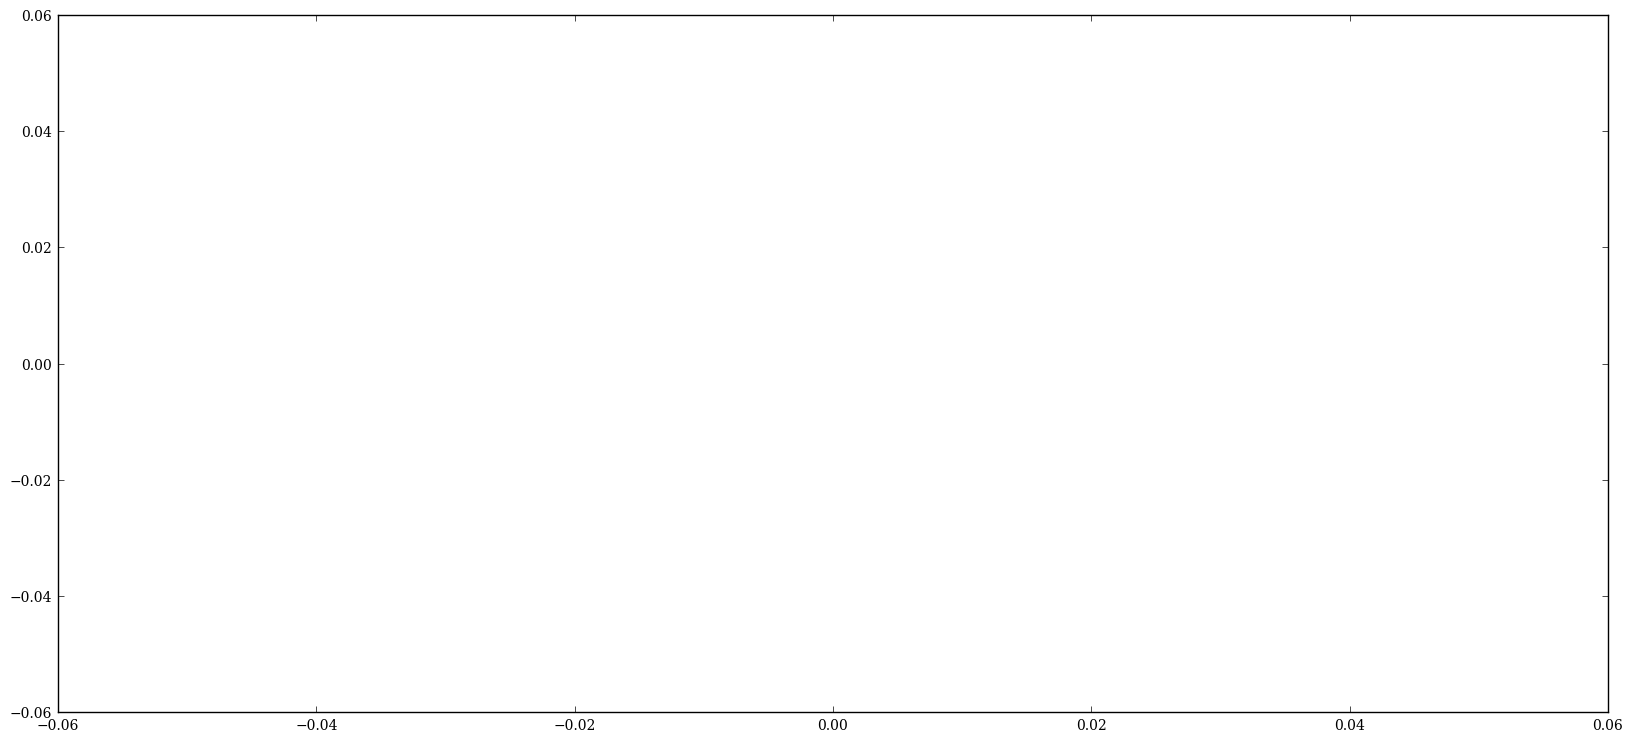

In [378]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()
# add axis specifications
line, = ax.plot([],[])

def animate(t):
    # assign current wave function to y
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0,10,0.1), # t-values
                               interval=50, # wait time before displaying new frame in ms
                               blit=True)

HTML(anim.to_jshtml())

### Exercise 6 (10 points)

Calculate eigenvalues and eigenfunction for other potentials. Try out adding a quartic term:
$$
V(x)=\frac{1}{2}x^2 + \lambda x^4
$$

In [366]:
def quartic(x,const):
    return 0.5*x**2 + const*x**4

def Hamiltonian_quartic(const):
    maindiag = quartic(grid,const) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(grid)-1)
    H = np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    return H

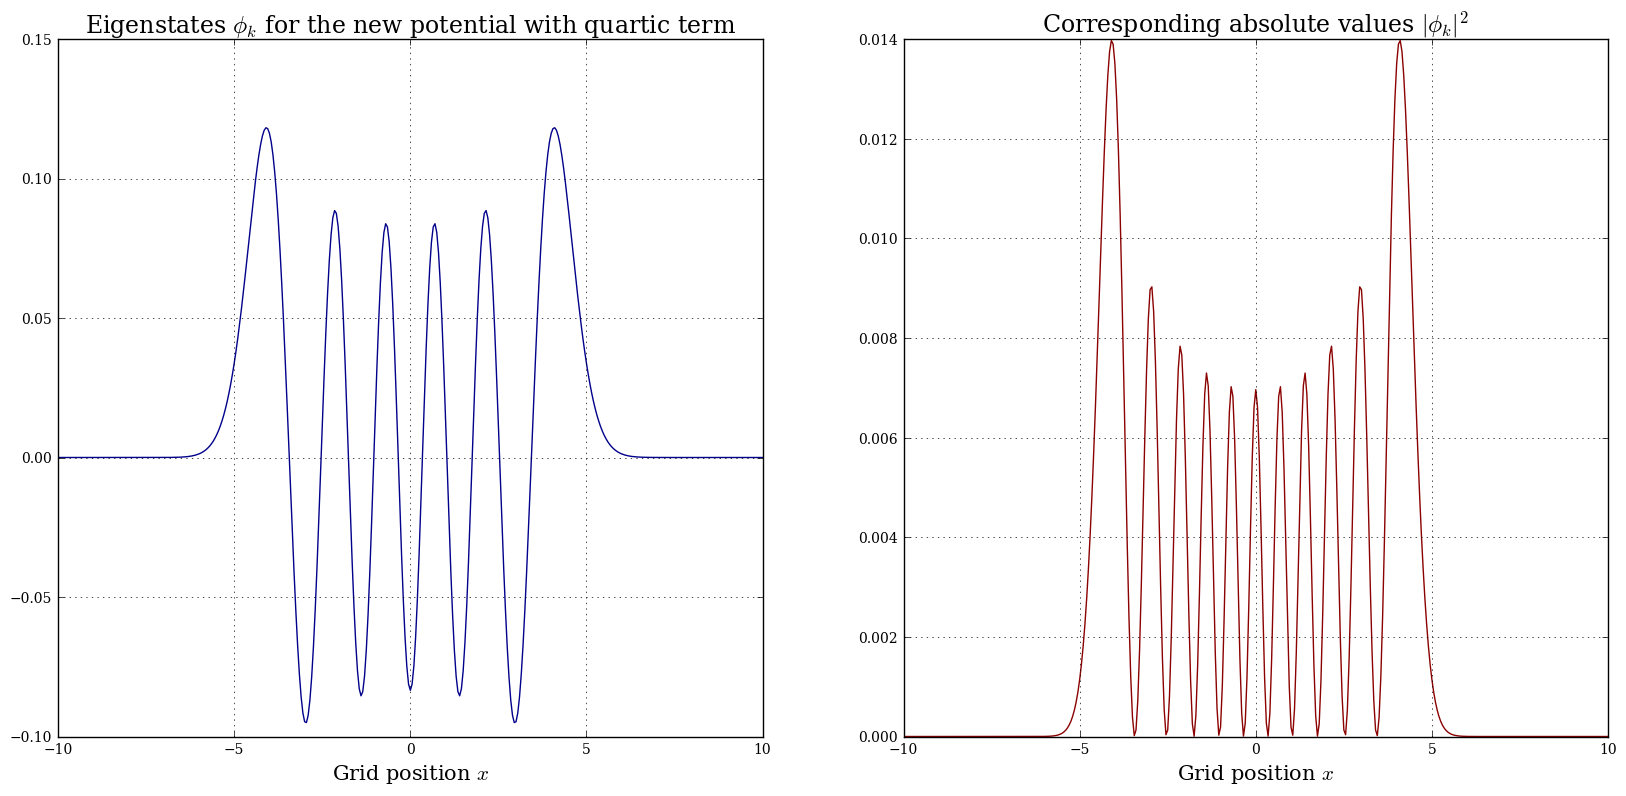

In [376]:
plt.rcParams["figure.figsize"][0] = 20


def eigenfunctions_quartic(k,const):
    #Diagonalize the Hamiltonian to solve the eigenvalue problem
    energies_quartic, states_quartic = np.linalg.eig(Hamiltonian_quartic(const))
    #Sorting the results
    energy_index_quartic = np.argsort(energies_quartic)
    
    plt.subplot(121)
    plt.plot(grid,states_quartic[:,energy_index_quartic[k]],color = 'darkblue')
    plt.title(r'Eigenstates $\phi_k$ for the new potential with quartic term' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(grid,np.abs(states_quartic[:,energy_index_quartic[k]])**2, color = 'darkred')
    plt.title(r'Corresponding absolute values $|\phi_k|^2$' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(eigenfunctions_quartic,k=(0,20),const=(0,100,1))

Try a double well:
$$
V(x)=-\frac{1}{2}x^2 + \lambda x^4
$$
What happens? Interpret your results.

In [374]:
def double_well(x,const):
    return -0.5*x**2 + const*x**4

def Hamiltonian_dw(const):
    maindiag = double_well(grid,const) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(grid)-1)
    H = np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    return H

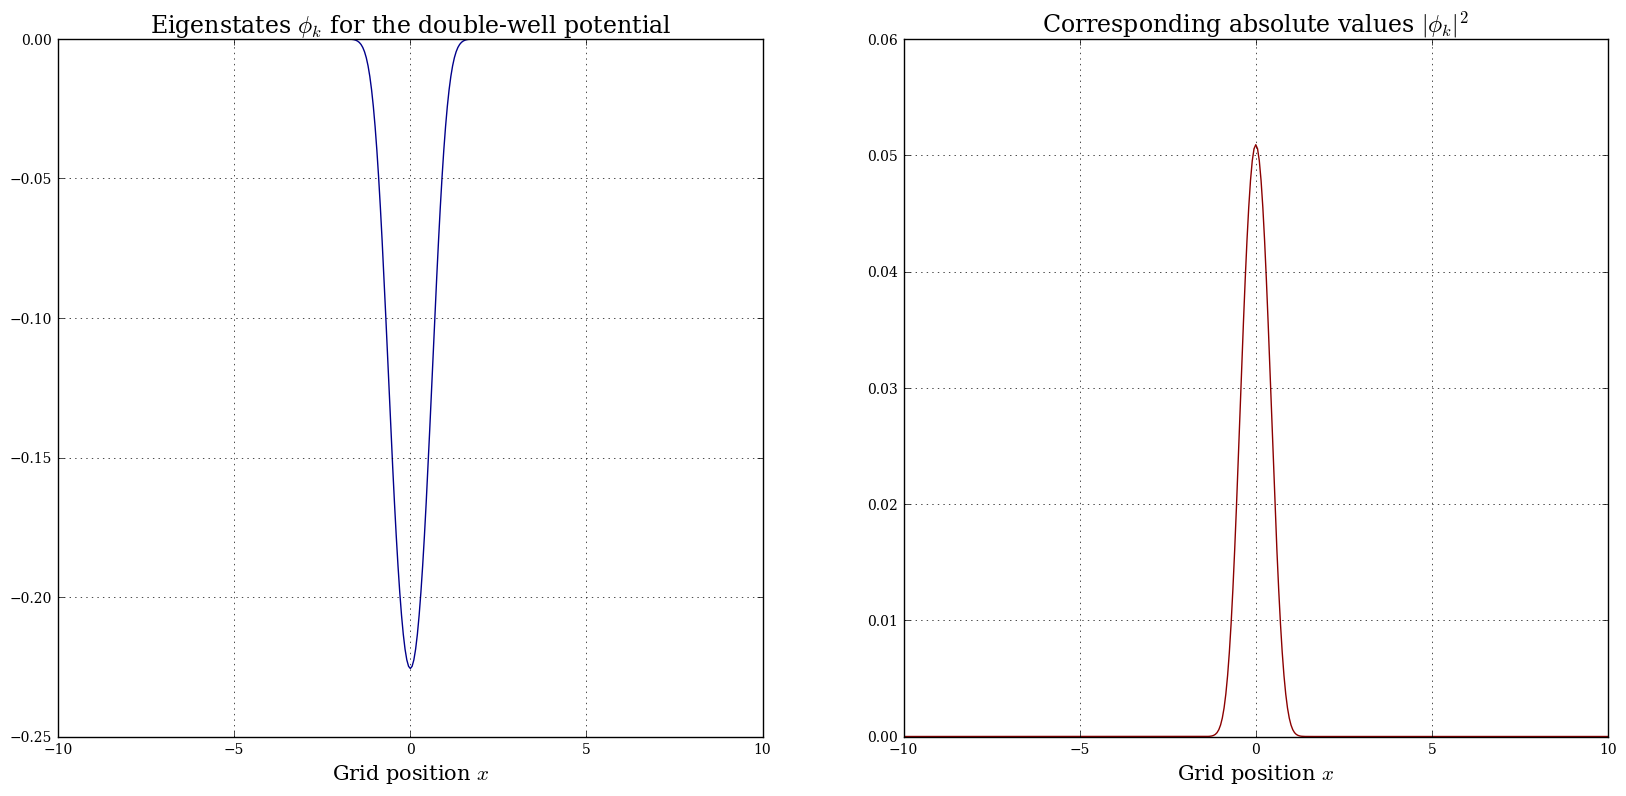

In [375]:
plt.rcParams["figure.figsize"][0] = 20


def eigenfunctions_dw(k,const):
    #Diagonalize the Hamiltonian to solve the eigenvalue problem
    energies_dw, states_dw = np.linalg.eig(Hamiltonian_dw(const))
    #Sorting the results
    energy_index_dw = np.argsort(energies_dw)
    
    plt.subplot(121)
    plt.plot(grid,states_dw[:,energy_index_dw[k]],color = 'darkblue')
    plt.title(r'Eigenstates $\phi_k$ for the double-well potential' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(grid,np.abs(states_dw[:,energy_index_dw[k]])**2, color = 'darkred')
    plt.title(r'Corresponding absolute values $|\phi_k|^2$' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(eigenfunctions_dw,k=(0,20),const=(0,10,0.1))